# Unit 5 - Financial Planning

In [55]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
import datetime as dt
import pytz
%matplotlib inline

In [56]:
# Load .env enviroment variables
load_dotenv()

True

In [57]:
api_key = os.getenv("QUANDL_API_KEY")
type(api_key)

str

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [58]:
#setting the current amount of crypto assets

my_btc = 1.2
my_eth = 5.3


In [59]:
# Crypto API URLs   

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()
#request_url = request=url+api_key
#request_url = request=url+api_key

In [60]:
# Fetching the current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]

# Fetching the current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Computing the current value of the crpto assets 
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price


# Printing the current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $64079.64
The current value of your 5.3 ETH is $21442.65


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [61]:
# Setting the current amount of shares
shares_data = {
    "shares":[200,50]
}

my_spy = 50
my_agg = 200

In [62]:
# Setting the Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Creating the Alpaca API object
alpaca = tradeapi.REST(
     alpaca_api_key,
     alpaca_secret_key,
     api_version ="v2")

In [63]:
# Formatting the current date as ISO format
today = pd.Timestamp("2022-04-06", tz="America/New_York").isoformat()

# Setting the tickers
tickers = ["AGG", "SPY"]

# Setting the timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Getting the current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# using a limit=1000 parameter to call the most recent 1000 days of data)
limit = 1000

AGG = df_portfolio[df_portfolio['symbol']=="AGG"].drop('symbol',axis = 1)
SPY = df_portfolio[df_portfolio['symbol']=="SPY"].drop('symbol',axis = 1)

df_portfolio = pd.concat([AGG,SPY],axis=1,keys=['AGG','SPY'])


df_shares = pd.DataFrame(shares_data, index = tickers)


#Preview DataFrame
df_portfolio



AGG                                      \
                            open     high      low   close    volume   
timestamp                                                              
2022-04-06 04:00:00+00:00  105.2  105.805  105.115  105.49  13322630   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-06 04:00:00+00:00       47090  105.463015  446.87  448.93  443.47   

                                                                     
                            close     volume trade_count       vwap  
timestamp                                                            
2022-04-06 04:00:00+00:00  446.52  105592595      901634  446.34527

In [64]:
# Picking the AGG and SPY close prices
df_close_price = pd.DataFrame()

df_close_price["AGG"] = df_portfolio["AGG"]["close"]
df_close_price["SPY"] = df_portfolio["SPY"]["close"]

df_close_price.index = df_close_price.index.date

agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $105.49
Current SPY closing price: $446.52


In [65]:
# Computing the current value of shares
my_spy_value = my_spy* (agg_close_price)  
my_agg_value = my_agg *(spy_close_price)
value_data ={
    "AGG":[my_agg_value],
    "SPY":[my_spy_value]
}

df_value = pd.DataFrame(value_data)
df_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5274.50
The current value of your 200 AGG shares is $89304.00


### Savings Health Analysis

In [66]:
# Setting the monthly household income
monthly_income = 12000

# Consolidating the financial assets data
df_savings ={
    "Crypto":[my_btc_value + my_eth_value],
    "Stocks":[my_spy_value + my_agg_value]
}

# Creating the savings DataFrame
df_savings = pd.DataFrame(df_savings,index = ["Amount"])

# Displaying the savings DataFrame
df_savings

,Crypto,Stocks
Amount,85522.281759,94578.5


In [67]:
#transposing the columns and rows
df_savings = df_savings.T
df_savings

,Amount
Crypto,85522.281759
Stocks,94578.500000


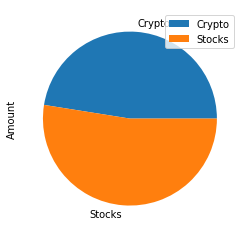

In [68]:
# Plotting the savings pie chart
df_savings.plot.pie(y="Amount")

In [70]:
# Setting the ideal emergency fund
emergency_fund = monthly_income * 3

# Calculating the total amount of savings
total_savings = int(df_savings.sum())


# Validating the saving health
if total_savings > emergency_fund:
    print('Congradulations! You have enough money in this fund.')
elif total_savings < emergency_fund:
    print('Congradulations for meeting this important goal!')
else: 
    print('You are()away from reaching your goal')
    
    
 

Congradulations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [71]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [72]:
# Getting 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

# Setting the timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Getting the current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# (using a limit=1000 parameter to call the most recent 1000 days of data)
limit = 1000

AGG = df_portfolio[df_portfolio['symbol']=="AGG"].drop('symbol',axis = 1)
SPY = df_portfolio[df_portfolio['symbol']=="SPY"].drop('symbol',axis = 1)

df_stock_data = pd.concat([AGG,SPY],axis=1,keys=['AGG','SPY'])


# Displaying sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [73]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
simulation_1 = MCSimulation(df_stock_data,[0.4,0.6],1000,252*30)

In [74]:
# Printing the simulation input data
simulation_1.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [75]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
simulation_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\truck\Documents\GitHub\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996464,1.001723,0.995530,1.008906,0.998202,1.004780,1.001746,0.993598,0.996674,0.989825,...,1.009968,1.000982,1.000134,1.006966,1.007695,0.999621,0.993114,1.006256,1.011224,0.994547
2,0.997105,1.012916,0.994843,1.016363,1.001548,1.007809,0.995638,0.992106,1.000486,0.991167,...,1.001039,1.001275,1.012626,0.997383,1.004476,0.998444,0.989887,1.009735,1.005386,1.014330
3,1.000808,1.013333,0.986523,1.023772,1.013352,1.012647,0.985691,0.986780,1.002371,0.995358,...,1.007482,0.996919,1.011020,0.996934,1.010550,1.009046,0.989658,1.023881,0.998512,1.016832
4,1.003605,1.016329,0.983247,1.028978,1.022776,1.026582,0.983512,0.977288,1.012842,0.993187,...,1.004184,0.994298,1.005234,0.993036,1.001096,1.011729,1.012861,1.031507,0.996839,1.012009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.285923,6.880852,13.197013,24.912664,4.369804,41.455279,12.720803,6.606986,17.737555,5.047683,...,19.146426,15.917590,14.629894,9.279070,10.352743,17.862071,27.792307,8.731962,31.394639,6.912268
7557,9.368874,6.875548,13.204497,24.976115,4.403328,41.131102,12.639266,6.596560,17.859579,5.093716,...,19.131368,15.822630,14.643223,9.295118,10.413408,17.893656,27.819797,8.851981,31.477218,6.905802
7558,9.405744,6.823413,13.478161,25.171153,4.406526,41.368626,12.611942,6.623883,18.027212,5.106727,...,19.072096,15.754037,14.331789,9.386067,10.495647,18.025820,27.899531,8.874389,31.429957,6.964385
7559,9.464135,6.885130,13.550027,25.037414,4.338112,41.821898,12.690376,6.604312,18.032007,5.134708,...,18.962310,15.795222,14.299642,9.360734,10.465337,18.058999,28.247957,8.958226,31.562766,6.943425


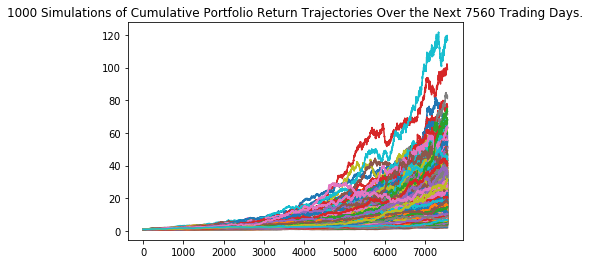

In [76]:
# Plotting the simulation outcomes
line_plot_1 = simulation_1.plot_simulation()

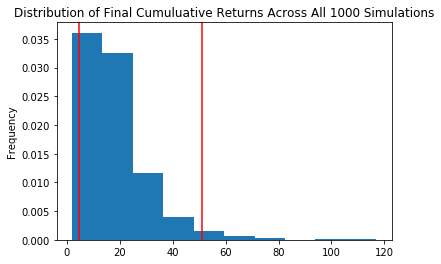

In [77]:
# Plotting the probability distribution and confidence intervals
dist_plot_1 = simulation_1.plot_distribution()


In [78]:
# Fetching the summary statistics from the Monte Carlo simulation results
tbl_1 = simulation_1.summarize_cumulative_return()

# Printing the summary statistics
print(tbl_1)

count           1000.000000
mean              18.440498
std               12.452401
min                1.882012
25%               10.104402
50%               15.317187
75%               22.946464
max              116.938949
95% CI Lower       4.632868
95% CI Upper      51.202080
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [79]:
# Setting the initial investment
initial_investment_1 = 20000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_1 = round(tbl_1[8]*20000,2)
ci_upper_1 = round(tbl_1[9]*20000,2)

# Printing the results
print(f"There is a 95% chance that an initial investment of ${initial_investment_1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_1} and ${ci_upper_1}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92657.36 and $1024041.6


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [80]:
# Setting the initial investment
initial_investment_2 = 20000 * 1.5

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(tbl_1[8]*30000,2)
ci_upper_2 = round(tbl_1[9]*30000,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $138986.04 and $1536062.41


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [81]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()
tickers = ["AGG", "SPY"]

# Setting the timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Getting the current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# (use a limit=1000 parameter to call the most recent 1000 days of data)
limit = 1000

AGG = df_portfolio[df_portfolio['symbol']=="AGG"].drop('symbol',axis = 1)
SPY = df_portfolio[df_portfolio['symbol']=="SPY"].drop('symbol',axis = 1)

df_stock_data = pd.concat([AGG,SPY],axis=1,keys=['AGG','SPY'])


# Displaying sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [82]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
simulation_2 = MCSimulation(df_stock_data,[0.4,0.6],1000,252*5)

simulation_2.portfolio_data.head()

simulation_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\truck\Documents\GitHub\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998538,0.988214,0.999868,1.001597,1.002961,0.995309,0.998664,0.984109,0.995055,0.997272,...,0.998221,0.992326,0.992270,0.999985,0.997730,0.996128,0.994385,0.998477,0.991193,1.001591
2,1.002519,0.992380,1.002283,0.997866,1.007459,0.983223,0.990639,0.976355,0.987834,0.997137,...,1.004181,0.991336,0.991736,1.001437,0.995654,0.994157,0.994908,0.996013,0.979214,1.000970
3,1.002169,0.992145,0.988924,1.006838,1.000117,0.978750,1.001675,0.990206,0.991677,1.007163,...,1.013186,0.984043,0.983506,1.001294,0.993090,0.986647,0.987482,1.010144,0.988013,0.993612
4,1.000995,0.990477,0.994996,1.019539,1.007646,0.972023,1.001795,0.988094,0.982210,1.018517,...,1.007037,0.990415,0.986146,0.997748,1.001381,0.995874,0.993223,1.000262,1.003625,0.998125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.269070,1.369765,1.365548,2.032053,1.857289,2.177102,1.897765,1.560734,1.023435,1.840535,...,1.625469,1.028158,2.220783,2.207528,1.087197,1.266573,1.795472,1.136730,1.484633,1.075537
1257,3.273530,1.365894,1.372669,2.039428,1.879204,2.169775,1.921271,1.557530,1.024739,1.855431,...,1.627691,1.034163,2.199491,2.231690,1.089902,1.258993,1.804029,1.136603,1.475272,1.067625
1258,3.262420,1.356430,1.381993,2.031148,1.884337,2.196616,1.913798,1.554049,1.016593,1.859132,...,1.657795,1.032495,2.218281,2.212557,1.083122,1.260519,1.810201,1.135080,1.481288,1.068837
1259,3.272296,1.362141,1.385262,2.040863,1.873458,2.189130,1.912770,1.541229,1.017187,1.870390,...,1.647400,1.027069,2.213029,2.223827,1.082321,1.253397,1.829926,1.138395,1.485409,1.077870


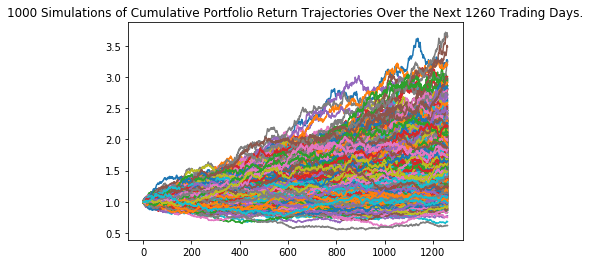

In [83]:
# Plotting the simulation outcomes
line_plot_2 = simulation_2.plot_simulation()

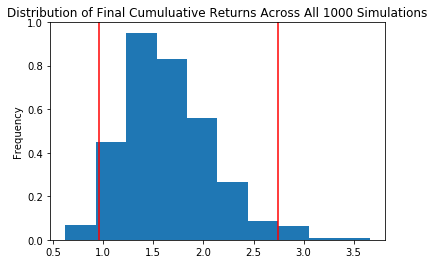

In [84]:
# Plotting the probability distribution and confidence intervals
dist_plot_2 = simulation_2.plot_distribution()

In [85]:
# Fetching the summary statistics from the Monte Carlo simulation results
tbl_2 = simulation_2.summarize_cumulative_return()

# Printing the summary statistics
print(tbl_2)

count           1000.000000
mean               1.652602
std                0.447427
min                0.619574
25%                1.345715
50%                1.591741
75%                1.911761
max                3.659004
95% CI Lower       0.955156
95% CI Upper       2.739665
Name: 1260, dtype: float64


In [86]:
# Setting the initial investment
initial_investment_3 = 60000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our 60000
ci_lower_3 = round(tbl_2[8]*60000,2)
ci_upper_3 = round(tbl_2[9]*60000,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_3} and ${ci_upper_3}")



There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $57309.36 and $164379.88


### Ten Years Retirement Option

In [87]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
simulation_3 = MCSimulation(df_stock_data,[0.4,0.6],1000,252*10)

simulation_3.portfolio_data.head()


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [88]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
simulation_3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\truck\Documents\GitHub\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006052,0.997436,1.005678,1.013396,1.002711,0.994044,1.006871,0.998821,0.996335,0.997924,...,0.982238,1.004440,0.994125,0.996459,0.994642,0.991827,1.003268,0.999360,1.002074,1.000419
2,1.006973,0.987025,1.002279,1.016652,0.994957,0.989293,1.008563,0.992986,1.002020,0.987364,...,0.970473,1.001746,0.992266,0.997021,0.989267,0.987363,0.996343,1.009829,1.003124,1.000794
3,1.008030,0.997674,1.008430,1.008011,1.003565,1.006254,1.001523,0.989597,0.991872,0.990763,...,0.971466,0.998266,0.991442,0.987741,0.990148,0.989697,0.999708,1.006368,1.000050,1.004812
4,1.004345,0.989964,1.003500,1.006165,1.006732,1.016065,1.003448,0.991094,0.991369,0.988020,...,0.960781,0.997771,1.004364,0.981099,0.992294,0.987862,1.012214,1.003517,1.000227,1.009059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.935491,3.543480,1.176396,3.252686,2.783954,3.333445,2.536117,6.263194,2.754166,1.862811,...,2.490502,2.374680,3.016276,3.547350,3.371576,3.988348,2.040597,2.183453,3.246015,2.557066
2517,1.918033,3.539458,1.165445,3.236181,2.781868,3.334769,2.540838,6.225336,2.756329,1.862803,...,2.502495,2.343469,3.037436,3.559469,3.357970,4.004240,2.042721,2.183081,3.202092,2.570397
2518,1.919742,3.553450,1.153130,3.228696,2.738748,3.303221,2.574789,6.211985,2.767469,1.873094,...,2.513922,2.312852,3.014466,3.546745,3.391963,4.008248,2.056463,2.198582,3.195491,2.588946
2519,1.919750,3.565887,1.150039,3.224581,2.718851,3.286398,2.567451,6.235919,2.750529,1.863142,...,2.529841,2.297909,3.008703,3.504658,3.421174,4.043642,2.065084,2.184411,3.220837,2.630684


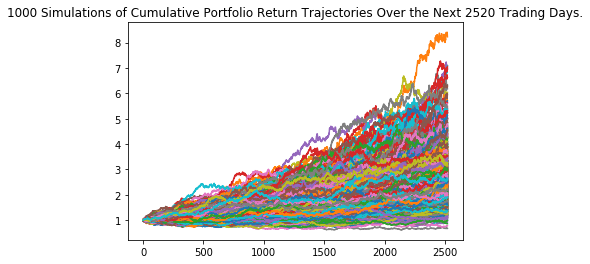

In [90]:
# Plotting the simulation outcomes
line_plot_3 = simulation_3.plot_simulation()

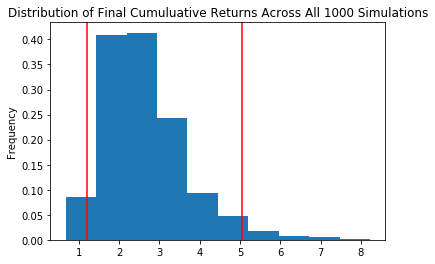

In [91]:
# Plotting the probability distribution and confidence intervals
dist_plot_3 = simulation_3.plot_distribution()

In [92]:
# Fetching the summary statistics from the Monte Carlo simulation results
tbl_3 = simulation_3.summarize_cumulative_return()

# Printing the summary statistics
print(tbl_3)

count           1000.000000
mean               2.636095
std                1.018147
min                0.678641
25%                1.894812
50%                2.460874
75%                3.149595
max                8.225481
95% CI Lower       1.211364
95% CI Upper       5.058779
Name: 2520, dtype: float64


In [93]:
# Setting the initial investment
initial_investment_4 = 60000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our 60000
ci_lower_ten = round(tbl_3[8]*60000,2)
ci_upper_ten = round(tbl_3[9]*60000,2)

# Printing the results
print(f"There is a 95% chance that an initial investment of ${initial_investment_4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $72681.87 and $303526.72
